# Section 3: Converting Between CAR and HEALPix Maps

Pixell is designed to allow users to convert maps between HEALPix format and ndmap (CAR) format.  This is particularly useful for individuals interested in comparing maps available only in the HEALPix basis to ACT maps.  The following code demonstrates a simple reprojection from one format to the other.

To return to the main notebook or to view a different section use the links in the table of contents.

Notebook Info | Value
---|---
Dependencies | `numpy`, `scipy`, `healpy`, `matplotlib`, `pixell` 
Data products | "act_planck_dr5.01_s08s18_AA_f150_night_map_dg_I.fits"
 | HFI_SkyMap_143_2048_R2.02_full.fits
Optional Data Products | "act_planck_dr5.01_s08s18_AA_f150_night_map.fits"
Memory usage | Medium (~ a few GB)
Contributors | Maya Mallaby-Kay, Zach Atkins

## Table of contents

 --- 
> [Section 1](Section_1_Introduction.ipynb): Overview and Introduction

> [Section 2](Section_2_coadded_maps.ipynb): Coadded maps from [Naess et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_N20.pdf) and an Introduction to Pixell

> [Section 3](Section_3_HEALPix_CAR_Conversions.ipynb):  Demonstration of methods to convert maps between HEALPix format and the CAR format.

> [Section 4](Section_4_visualize_objects.ipynb):  The DR5 Cluster Catalog from [Hilton et al (2020)](https://arxiv.org/abs/2009.11043) and Visualizing Objects in the Maps

> [Section 5](Section_5_Lensing_maps.ipynb):  Introduction to the Lensing maps from [Darwish et al (2020)](https://arxiv.org/pdf/2004.01139.pdf)

> [Section 6](Section_6_Component_separated_maps.ipynb):  Guide to the use of the Component Separated maps from [Madhavacheril et al (2019)](https://arxiv.org/abs/1911.05717)

> [Section 7](Section_7_power_spectra_part_1.ipynb): Power Spectra Part 1 - Harmonic Analysis using CAR maps [Naess et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_N20.pdf)

> [Section 8](Section_8_power_spectra_part_2.ipynb) Power Spectra Part 2 - Power Spectrum example using Nawrapper [Aiola et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_A20.pdf) and [Choi et al (2020)](https://phy-act1.princeton.edu/public/saiola/act_dr4_C20.pdf) 

> [Section 9](Section_9_Noise_sims.ipynb): Generating Noise Simulations 

> [Section 10](Section_10_E_B_maps.ipynb):  Look at how to generate E and B maps from I, Q, U maps. 

> [Section 11](Section_11_ACT_likelihood.ipynb): Using the ACT Likelihood code

> [Section 12](Section_12_delensing_param_shifts.ipynb):  Delensing the CMB powerspectrum and comparing the delensed and lensed parameters from [Han et al. (2020)](https://arxiv.org/pdf/2007.14405.pdf)
 
---


## Initialize notebook

We rerun the first notebook in order to import packages and set the data path.  From there we will read in the coadded map.  As described in the previous notebook there are two ways to handle this: users can choose to import the lower resolution, full-size map, or the full resolution, full-size map depending on their computer's capabilities.  To that end make the appropriate choice for your computer and edit the code if need be.

In [1]:
%run Section_1_Introduction.ipynb

# Redefine our plotting function from section 2
def eshow(x,**kwargs): 
    ''' Define a function to help us plot the maps neatly '''
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = "ipython")

In [2]:
# Read in the coadded map.  
# This defaults to the downgraded map, to switch to the full resolution replace fname_dg with fname_full

fname_dg = "act_planck_dr5.01_s08s18_AA_f150_night_map_dg_I.fits"
fname_full = "act_planck_dr5.01_s08s18_AA_f150_night_map.fits"

# Set the size of the box in degrees and convert to radians
dec_from, dec_to = np.deg2rad([-40,-10])
ra_from, ra_to = np.deg2rad([-25, 25])
box = [[dec_from,ra_from],[dec_to,ra_to]]

# read in the map, if you are reading in the full map but would 
# like to just read in the I component you can add [0] to the end of the command.

imap = enmap.read_map(path + fname_dg, box = box)

## Begin Converting Between HEALPix and CAR


In addition to considering the format of their data, one must also consider the physical basis of the map itself. Therefore, note that Pixell automatically rotates maps from Planck's Galactic projection to Equatorial when reprojecting data from HEALPix to CAR; if you are projecting a map from other coordinates, a different rotation may be needed. 

Note that projections work by finding the spherical harmonic transformation of the HEALPix map, and then inverse-transforms the alm's to the rectangular pixel map geometry. Therefore, reprojections will be bandwidth limited by that of the harmonic transform.  

Finally, for users interested in examining small patches of sky, we further encourage the use of the CAR format with Pixell. As we will see in the next notebook, it enables users to reference small patches with functionality not available in HEALPix.

### Convert a planck HEALPix map to CAR

/Users/tonyguest/Downloads/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/Users/tonyguest/Downloads/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/Users/tonyguest/Downloads/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/Users/tonyguest/Downloads/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXS

Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting


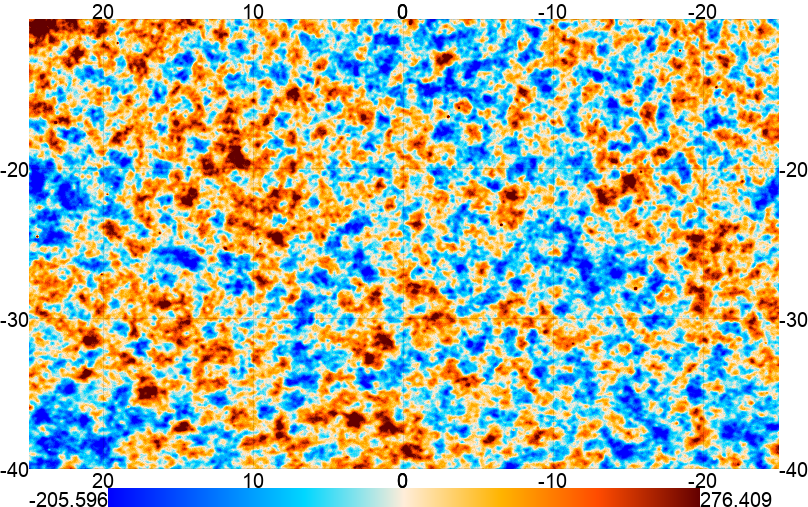

In [3]:
# Read in Planck Map
pmap_fname = path + "HFI_SkyMap_143_2048_R2.02_full.fits"

# Reproject the map to the same shape and wcs as our smap_2 from the previous notebook 
# (linked in the table of contents as section 2)
# Use the "unit" argument to convert Planck from Kelvin to uKelvin
planck_map = reproject.enmap_from_healpix(pmap_fname, imap.shape, imap.wcs,
                                  ncomp=1, unit=1e-6, lmax=6000,rot='gal,equ')

# Visualize using eshow
eshow(planck_map, **{"downgrade": 2, "colorbar":True, "ticks": 10, })

<font color='red'> EXERCISE: </font> Now reproject the Planck map into CAR again, but using a new region - for example, try making it narrower in declination range, and wider in right ascension. You can do this by creating a new imap with a different box. (Note, if you try to make the region too small, the plotting routine complains if you also try to add colorbar:True)

In [4]:
#Your code and plots go here
fname_dg = "act_planck_dr5.01_s08s18_AA_f150_night_map_dg_I.fits"
fname_full = "act_planck_dr5.01_s08s18_AA_f150_night_map.fits"

# Set the size of the box in degrees and convert to radians
dec_from, dec_to = np.deg2rad([-20,-5])
ra_from, ra_to = np.deg2rad([-40, 40])
box_ex = [[dec_from,ra_from],[dec_to,ra_to]]

# read in the map, if you are reading in the full map but would 
# like to just read in the I component you can add [0] to the end of the command.

imap = enmap.read_map(path + fname_dg, box = box_ex)



/Users/tonyguest/Downloads/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/Users/tonyguest/Downloads/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/Users/tonyguest/Downloads/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/Users/tonyguest/Downloads/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXS

Preparing SHT
T -> alm
float64 complex128
Computing pixel positions
Computing rotated positions
Projecting


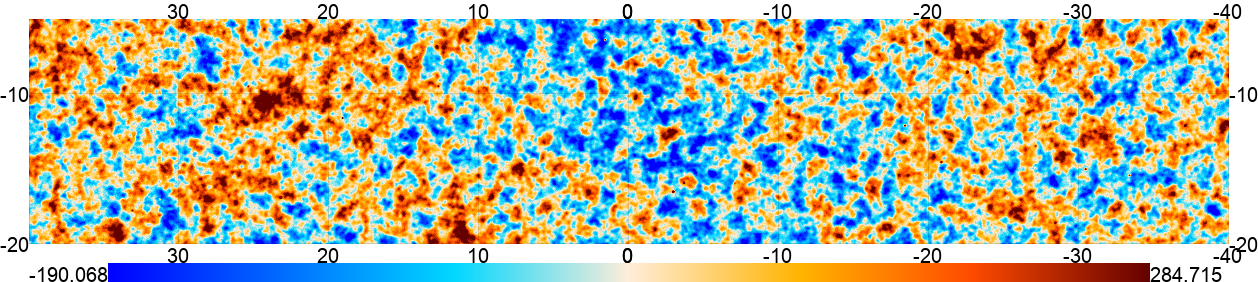

In [5]:
# Read in Planck Map
pmap_fname = path + "HFI_SkyMap_143_2048_R2.02_full.fits"

# Reproject the map to the same shape and wcs as our smap_2 from the previous notebook 
# (linked in the table of contents as section 2)
# Use the "unit" argument to convert Planck from Kelvin to uKelvin
planck_map = reproject.enmap_from_healpix(pmap_fname, imap.shape, imap.wcs,
                                  ncomp=1, unit=1e-6, lmax=6000,rot='gal,equ')

# Visualize using eshow
eshow(planck_map, **{"downgrade": 2, "colorbar":True, "ticks": 10, })

### Convert a CAR map to HEALPix 

We can also take our trimmed ACT map and reproject it to the HEALPix format using `reproject` as shown here.

/Users/tonyguest/Downloads/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/Users/tonyguest/Downloads/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/Users/tonyguest/Downloads/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(


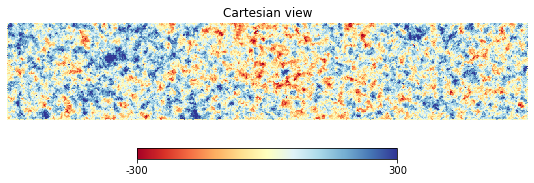

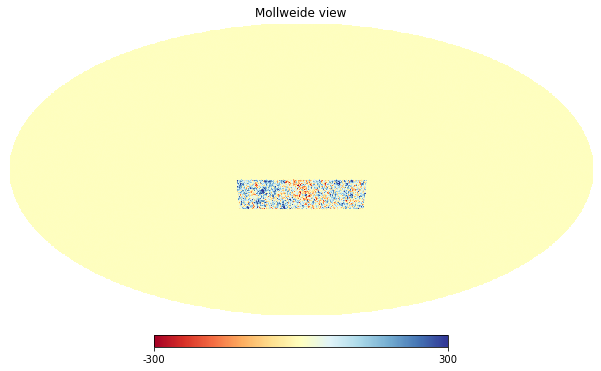

In [6]:
# Convert an ndmap map to HEALPix
smap_healpix = reproject.healpix_from_enmap(imap, lmax = 6000, nside = 512)

# Plot using healpy
lonra = np.sort(imap.box()[:, 1])/utils.degree
latra = np.sort(imap.box()[:, 0])/utils.degree
rang = 300

hp.cartview(smap_healpix, lonra = lonra, latra = latra, min = -rang, max = rang, 
            cmap = cm.get_cmap('RdYlBu'))

hp.mollview(smap_healpix, min = -rang, max = rang, 
            cmap = cm.get_cmap('RdYlBu'))

Again, keep in mind that these reprojection methods bandlimit the result according to the parameter "lmax." See the Pixell documentation for more information.

### Continue to the next section

[Section 4](Section_4_visualize_objects.ipynb):  Guide to using Pixell to look at objects in the maps and stacking our maps on catalogue positions.